# Análise e Previsão do Valor do Dólar

* Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

* Baixando os dados históricos do dólar desde 2019

In [136]:
ticker = 'USDBRL=X'
dados = yf.download(ticker, start='2019-01-01', end='2025-01-25')

[*********************100%***********************]  1 of 1 completed


* Visualizando graficamente o histórico de valores

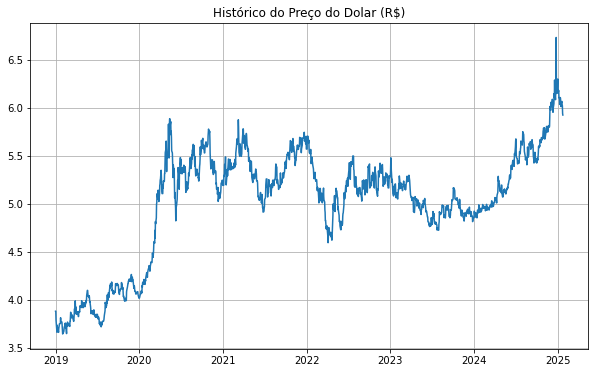

In [137]:
plt.figure(figsize=(10,6))
plt.plot(dados['Close'])
plt.title('Histórico do Preço do Dolar (R$)')
plt.grid()
plt.show()

* Calculando as médias móveis de 50 e 200 dias

In [138]:
dados['SMA_50'] = dados['Close'].rolling(window=50).mean()
dados['SMA_200'] = dados['Close'].rolling(window=200).mean()

* Visualizando graficamente as médias móveis e o preço de fechamento ao longo do tempo

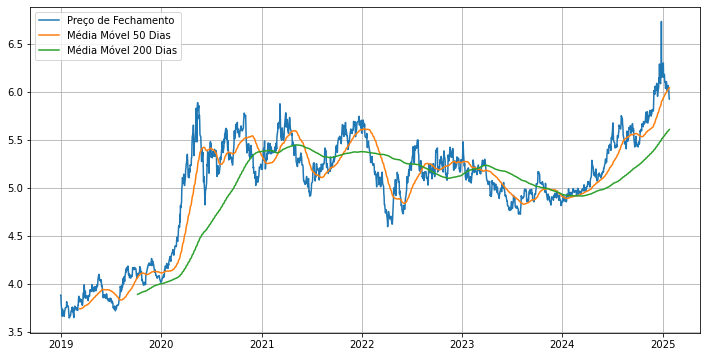

In [139]:
plt.figure(figsize=(12,6))
plt.plot(dados['Close'], label='Preço de Fechamento')
plt.plot(dados['SMA_50'], label='Média Móvel 50 Dias')
plt.plot(dados['SMA_200'], label='Média Móvel 200 Dias')
plt.grid()
plt.legend()
plt.show()

* Importando biblioteca de previsão

In [31]:
from prophet import Prophet

* Preparando os dados para previsão

In [140]:
dados.reset_index(inplace=True)

In [141]:
dados = dados[['Date','Close']].rename(columns={'Date':'ds', 'Close':'y'})

In [142]:
dados

,ds,y
0,2019-01-01,3.880000
1,2019-01-02,3.879900
2,2019-01-03,3.786300
3,2019-01-04,3.755100
4,2019-01-07,3.661200
...,...,...
1577,2025-01-20,6.066163
1578,2025-01-21,6.029800
1579,2025-01-22,6.020500
1580,2025-01-23,5.940300


* Separando os dados entre treino e teste

In [143]:
split_date = '2023-12-31'
train = dados[dados['ds'] <= split_date]
test = dados[dados['ds'] > split_date]

In [144]:
train.shape, test.shape

((1303, 2), (279, 2))

* Criando e ajustando o modelo Prophet

In [51]:
model = Prophet()
model.fit(dados)

20:56:58 - cmdstanpy - INFO - Chain [1] start processing
20:57:01 - cmdstanpy - INFO - Chain [1] done processing


* Criando datas futuras e realizando as previsões

In [145]:
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

In [146]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,3.768373,3.634847,3.987724,3.768373,3.768373,0.043136,0.043136,0.043136,-0.011042,-0.011042,-0.011042,0.054178,0.054178,0.054178,0.0,0.0,0.0,3.811509
1,2019-01-02,3.769577,3.613698,3.980308,3.769577,3.769577,0.035106,0.035106,0.035106,-0.017144,-0.017144,-0.017144,0.052251,0.052251,0.052251,0.0,0.0,0.0,3.804683
2,2019-01-03,3.770780,3.617975,3.973699,3.770780,3.770780,0.034636,0.034636,0.034636,-0.015324,-0.015324,-0.015324,0.049959,0.049959,0.049959,0.0,0.0,0.0,3.805416
3,2019-01-04,3.771984,3.620604,3.982384,3.771984,3.771984,0.030060,0.030060,0.030060,-0.017248,-0.017248,-0.017248,0.047308,0.047308,0.047308,0.0,0.0,0.0,3.802044
4,2019-01-07,3.775594,3.613657,3.976415,3.775594,3.775594,0.016670,0.016670,0.016670,-0.020664,-0.020664,-0.020664,0.037333,0.037333,0.037333,0.0,0.0,0.0,3.792263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,2025-10-30,6.747086,6.010342,7.753811,5.927925,7.638467,0.077308,0.077308,0.077308,-0.015324,-0.015324,-0.015324,0.092632,0.092632,0.092632,0.0,0.0,0.0,6.824394
1858,2025-10-31,6.749806,5.992523,7.715597,5.927345,7.643826,0.072007,0.072007,0.072007,-0.017248,-0.017248,-0.017248,0.089255,0.089255,0.089255,0.0,0.0,0.0,6.821813
1859,2025-11-01,6.752526,6.066014,7.817531,5.926764,7.651552,0.126736,0.126736,0.126736,0.040711,0.040711,0.040711,0.086025,0.086025,0.086025,0.0,0.0,0.0,6.879261
1860,2025-11-02,6.755246,6.068803,7.800414,5.926184,7.662892,0.123699,0.123699,0.123699,0.040710,0.040710,0.040710,0.082988,0.082988,0.082988,0.0,0.0,0.0,6.878944


* Extraindo previsões dos dados de teste

In [148]:
forecast_test = forecast[forecast['ds'].isin(test['ds'])]

In [149]:
forecast_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1303,2024-01-01,4.930116,4.788707,5.147526,4.930116,4.930116,0.033939,0.033939,0.033939,-0.020664,-0.020664,-0.020664,0.054602,0.054602,0.054602,0.0,0.0,0.0,4.964054
1304,2024-01-02,4.932836,4.790587,5.159634,4.932836,4.932836,0.041725,0.041725,0.041725,-0.011042,-0.011042,-0.011042,0.052766,0.052766,0.052766,0.0,0.0,0.0,4.974560
1305,2024-01-03,4.935556,4.787559,5.156220,4.935556,4.935556,0.033422,0.033422,0.033422,-0.017144,-0.017144,-0.017144,0.050566,0.050566,0.050566,0.0,0.0,0.0,4.968978
1306,2024-01-04,4.938276,4.800954,5.136066,4.938276,4.938276,0.032680,0.032680,0.032680,-0.015324,-0.015324,-0.015324,0.048004,0.048004,0.048004,0.0,0.0,0.0,4.970956
1307,2024-01-05,4.940996,4.793722,5.134781,4.940996,4.940996,0.027842,0.027842,0.027842,-0.017248,-0.017248,-0.017248,0.045089,0.045089,0.045089,0.0,0.0,0.0,4.968837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,2025-01-20,5.977321,5.759745,6.099742,5.977321,5.977321,-0.044032,-0.044032,-0.044032,-0.020664,-0.020664,-0.020664,-0.023368,-0.023368,-0.023368,0.0,0.0,0.0,5.933290
1578,2025-01-21,5.980041,5.770404,6.122437,5.980041,5.980041,-0.038402,-0.038402,-0.038402,-0.011042,-0.011042,-0.011042,-0.027360,-0.027360,-0.027360,0.0,0.0,0.0,5.941639
1579,2025-01-22,5.982761,5.756447,6.113752,5.982761,5.982761,-0.048304,-0.048304,-0.048304,-0.017144,-0.017144,-0.017144,-0.031160,-0.031160,-0.031160,0.0,0.0,0.0,5.934457
1580,2025-01-23,5.985481,5.748604,6.115060,5.985481,5.985481,-0.050088,-0.050088,-0.050088,-0.015324,-0.015324,-0.015324,-0.034765,-0.034765,-0.034765,0.0,0.0,0.0,5.935393


* Calculando métricas de desempenho

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [150]:
y_true = test['y'].values
y_pred = forecast_test['yhat'].values

In [151]:
y_true.shape, y_pred.shape

((279,), (279,))

In [152]:
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

* Exibindo métricas de desempenho

In [156]:
print(f'Erro Absoluto Médio (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
print(f'Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%')

Erro Absoluto Médio (MAE): 0.12
Erro Quadrático Médio (MSE): 0.02
Raiz do Erro Quadrático Médio (RMSE): 0.15
Erro Percentual Absoluto Médio (MAPE): 2.16%


* Visualizando graficamente as previsões (gráfico estatístico)

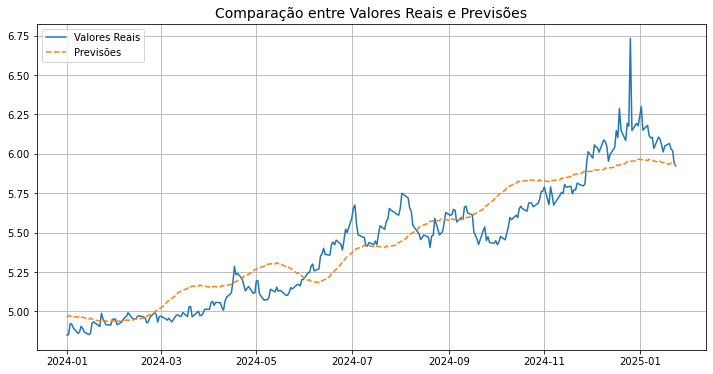

In [161]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], y_true, label='Valores Reais')
plt.plot(forecast_test['ds'], y_pred, label='Previsões', linestyle='--')
plt.title('Comparação entre Valores Reais e Previsões', size=14)
plt.legend()
plt.grid()
plt.show()

* Visualizando graficamente as previsões (gráfico interativo)

In [61]:
from prophet.plot import plot_plotly

In [68]:
fig = plot_plotly(model, forecast)
fig.update_layout(title = 'Previsão do Valor do Dolar (R$)', xaxis_title = 'Data', yaxis_title = 'Valor do Dolar (R$)')
fig.show()